<a href="https://colab.research.google.com/github/y-lims/DADS7202_Potato/blob/main/Similarity_L_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Lib

In [1]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print( f"Matplotlib {matplotlib.__version__}\n" )

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

# from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

import os
import sys
import numpy as np
import pandas as pd
import random as rn
import sklearn
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow import keras
# from keras.preprocessing.image import ImageDataGenerator
from IPython.display import Image, display
import matplotlib.cm as cmp
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split

import os
import numpy as np
import tensorflow as tf

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt



Python 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]

NumPy 1.26.4

Matplotlib 3.7.1

TensorFlow 2.17.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


# Set up

In [2]:
# # Set fixed seeding values for reproducability during experiments
# # Skip this cell if random initialization (with varied results) is needed
# np_random_seed = 1
# tf_random_seed = 1

# seedno = 1
# model_name = 'vgg16'
# version = 'v4'

# owner_name = 'l_model'


# # Define a flag to check if running on Colab
# on_colab = 'google.colab' in str(get_ipython())

# # -----------------------------------------------------------------



In [4]:
if on_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    base_path = '/content/drive/My Drive/Final_Potato'
else:
    base_path = 'D:/anaconda3/envs/tfv1/00_deep_prj/Final_Potato'


Mounted at /content/drive


# Load Data

# Train set

==== Healthy ====
Shape of x (Healthy): (305, 224, 224, 3)
Shape of y (Healthy): (305,)
latest index :  304


array([[[ 62,  56,  32],
        [ 63,  57,  33],
        [ 66,  60,  36],
        ...,
        [ 88,  70,  48],
        [ 86,  68,  46],
        [ 85,  67,  45]],

       [[ 66,  60,  36],
        [ 67,  61,  37],
        [ 69,  63,  39],
        ...,
        [ 88,  70,  48],
        [ 87,  69,  47],
        [ 86,  68,  46]],

       [[ 70,  64,  40],
        [ 71,  65,  41],
        [ 72,  66,  42],
        ...,
        [ 89,  71,  49],
        [ 88,  70,  48],
        [ 87,  69,  47]],

       ...,

       [[ 89,  63,  46],
        [ 90,  64,  47],
        [ 92,  66,  49],
        ...,
        [127, 101,  76],
        [126, 100,  75],
        [125,  99,  74]],

       [[ 88,  62,  45],
        [ 89,  63,  46],
        [ 91,  65,  48],
        ...,
        [126, 100,  75],
        [125,  99,  74],
        [124,  98,  73]],

       [[ 88,  62,  45],
        [ 89,  63,  46],
        [ 91,  65,  48],
        ...,
        [126, 100,  75],
        [124,  98,  73],
        [124,  98,  73]]], dtype=uint8)
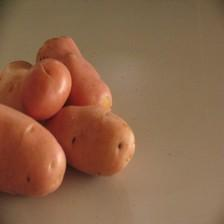

==== Blackleg ====
Shape of x (Blackleg): (60, 224, 224, 3)
Shape of y (Blackleg): (60,)
latest index :  364


array([[[230, 237, 243],
        [230, 237, 243],
        [231, 238, 244],
        ...,
        [220, 225, 231],
        [219, 224, 230],
        [219, 224, 230]],

       [[230, 237, 243],
        [230, 237, 243],
        [231, 238, 244],
        ...,
        [219, 224, 230],
        [219, 224, 230],
        [220, 225, 231]],

       [[231, 238, 244],
        [231, 238, 244],
        [232, 239, 245],
        ...,
        [218, 223, 229],
        [219, 224, 230],
        [220, 225, 231]],

       ...,

       [[235, 240, 244],
        [235, 240, 244],
        [236, 241, 245],
        ...,
        [216, 219, 226],
        [216, 219, 226],
        [216, 219, 226]],

       [[235, 240, 244],
        [235, 240, 244],
        [236, 241, 245],
        ...,
        [216, 219, 226],
        [216, 219, 226],
        [216, 219, 226]],

       [[235, 240, 244],
        [235, 240, 244],
        [236, 241, 245],
        ...,
        [215, 218, 225],
        [215, 218, 225],
        [215, 218, 225]]], dtype=uint8)
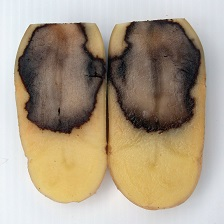


==== Black Scurf ====
Shape of x (Black Scurf): (58, 224, 224, 3)
Shape of y (Black Scurf): (58,)
latest index :  422


array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]], dtype=uint8)
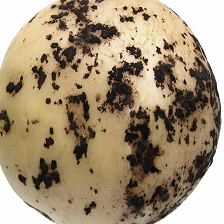


==== Pink Rot ====
Shape of x (Pink Rot): (57, 224, 224, 3)
Shape of y (Pink Rot): (57,)
latest index :  479


array([[[11, 11, 11],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [11, 11, 11],
        [13, 13, 13],
        [12, 12, 12]],

       [[11, 11, 11],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [11, 11, 11],
        [13, 13, 13],
        [12, 12, 12]],

       [[11, 11, 11],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [11, 11, 11],
        [13, 13, 13],
        [12, 12, 12]],

       ...,

       [[14, 14, 14],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [13, 13, 13]],

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [16, 16, 16]],

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [16, 16, 16]]], dtype=uint8)
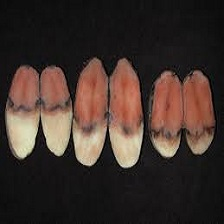


==== Common Scab ====
Shape of x (Common Scab): (62, 224, 224, 3)
Shape of y (Common Scab): (62,)
latest index :  541


array([[[ 92,  72,  47],
        [ 90,  70,  45],
        [ 89,  69,  44],
        ...,
        [136,  69,  50],
        [133,  66,  49],
        [130,  63,  46]],

       [[ 84,  64,  39],
        [ 82,  62,  37],
        [ 80,  60,  35],
        ...,
        [129,  67,  46],
        [128,  65,  47],
        [128,  65,  47]],

       [[ 81,  61,  36],
        [ 78,  58,  33],
        [ 77,  57,  33],
        ...,
        [127,  71,  48],
        [127,  70,  50],
        [129,  72,  52]],

       ...,

       [[ 46,  82, 130],
        [ 46,  84, 129],
        [ 46,  85, 128],
        ...,
        [193, 133,  63],
        [196, 136,  66],
        [203, 144,  74]],

       [[ 46,  84, 133],
        [ 44,  85, 131],
        [ 43,  84, 128],
        ...,
        [191, 130,  67],
        [186, 126,  63],
        [191, 133,  69]],

       [[ 43,  83, 134],
        [ 42,  82, 131],
        [ 41,  82, 126],
        ...,
        [191, 131,  69],
        [182, 122,  60],
        [183, 125,  62]]], dtype=uint8)
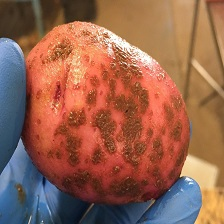


==== Dry Rot ====
Shape of x (Dry Rot): (60, 224, 224, 3)
Shape of y (Dry Rot): (60,)
latest index :  601


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [240, 249, 248],
        [240, 249, 248],
        [240, 249, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [240, 249, 248],
        [240, 249, 248],
        [240, 249, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [240, 249, 248],
        [240, 249, 248],
        [241, 250, 249]]], dtype=uint8)
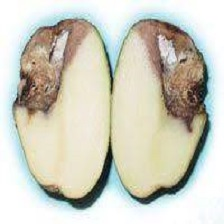

In [15]:
allowed_extensions = (".JPG", ".jpg", ".jpeg", ".JPEG", ".PNG", ".png")
# class_mapping = {'Healthy': 0, 'Blackleg': 1, 'Black Scurf': 1, 'Pink Rot': 1, 'Common Scab': 1, 'Dry Rot': 1}
class_mapping = {'Healthy': 0, 'Blackleg': 1, 'Black Scurf': 2, 'Pink Rot': 3, 'Common Scab': 4, 'Dry Rot': 5}

def process_dataset_nosplit(folder_path, class_name):

    print(f'==== {class_name} ====')
    x, y, z = [], [], []
    for filename in os.listdir(os.path.join(folder_path, class_name)):
        if filename.endswith(allowed_extensions):
            file_path = os.path.join(folder_path, class_name, filename)
            img = tf.keras.preprocessing.image.load_img(file_path, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img).astype(np.uint8)
            x.append(img_array)
            y.append(class_mapping[class_name])
            z.append([class_name, filename])


    x = np.array(x)
    y = np.array(y).reshape(-1,)
    print(f"Shape of x ({class_name}):", x.shape)
    print(f"Shape of y ({class_name}):", y.shape)
    return x, y, z

# ==========================================================================================

folder_path = '/content/drive/My Drive/Final_Potato/train_data/archive/'
x, y, z = process_dataset_nosplit(folder_path, 'Healthy')
x_combined, y_combined, z_combined = x, y, z
print('latest index : ', len(x_combined) - 1)
display(x[0])

check_ind = [len(x_combined) - 1]
check_class = ['Healthy']
for i in list(class_mapping.keys())[1:]:
    x, y, z = process_dataset_nosplit(folder_path, i)
    x_combined = np.concatenate((x_combined, x), axis=0)
    y_combined = np.concatenate((y_combined, y), axis=0)
    z_combined = np.concatenate((z_combined, z), axis=0)
    print('latest index : ', len(x_combined) - 1)
    display(x[0])
    print()
    check_ind.append(len(x_combined) - 1)
    check_class.append(i)

x_train, y_train = x_combined, y_combined



# Test set

==== Healthy ====
Shape of x (Healthy): (307, 224, 224, 3)
Shape of y (Healthy): (307,)
latest index :  306


array([[[220, 221, 216],
        [218, 219, 214],
        [207, 208, 203],
        ...,
        [200, 201, 195],
        [201, 202, 196],
        [201, 202, 196]],

       [[215, 216, 211],
        [211, 212, 207],
        [220, 221, 216],
        ...,
        [198, 199, 193],
        [201, 202, 196],
        [201, 202, 196]],

       [[219, 220, 215],
        [210, 211, 206],
        [216, 217, 212],
        ...,
        [202, 203, 197],
        [201, 202, 196],
        [202, 203, 197]],

       ...,

       [[203, 204, 198],
        [203, 204, 198],
        [203, 204, 198],
        ...,
        [195, 196, 190],
        [196, 197, 191],
        [197, 198, 192]],

       [[202, 203, 197],
        [204, 205, 199],
        [204, 205, 199],
        ...,
        [195, 196, 190],
        [195, 196, 190],
        [195, 196, 190]],

       [[201, 202, 196],
        [204, 205, 199],
        [204, 205, 199],
        ...,
        [195, 196, 190],
        [192, 193, 187],
        [194, 195, 189]]], dtype=uint8)
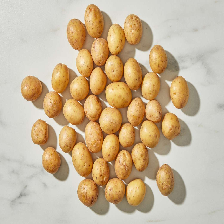

==== Blackleg ====
Shape of x (Blackleg): (60, 224, 224, 3)
Shape of y (Blackleg): (60,)
latest index :  366


array([[[182, 176, 180],
        [183, 177, 181],
        [183, 177, 181],
        ...,
        [165, 170, 166],
        [165, 170, 166],
        [166, 171, 167]],

       [[181, 175, 179],
        [184, 178, 182],
        [184, 178, 182],
        ...,
        [164, 169, 165],
        [164, 169, 165],
        [164, 169, 165]],

       [[180, 174, 178],
        [184, 178, 182],
        [184, 178, 182],
        ...,
        [165, 167, 164],
        [165, 167, 164],
        [165, 167, 164]],

       ...,

       [[194, 195, 213],
        [195, 196, 214],
        [195, 196, 214],
        ...,
        [190, 198, 211],
        [190, 198, 211],
        [194, 202, 215]],

       [[191, 192, 212],
        [192, 193, 213],
        [192, 193, 213],
        ...,
        [187, 195, 208],
        [187, 195, 208],
        [189, 197, 210]],

       [[199, 200, 221],
        [188, 189, 210],
        [188, 189, 210],
        ...,
        [189, 197, 210],
        [189, 197, 210],
        [188, 196, 209]]], dtype=uint8)
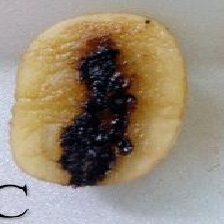


==== Black Scurf ====
Shape of x (Black Scurf): (66, 224, 224, 3)
Shape of y (Black Scurf): (66,)
latest index :  432


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
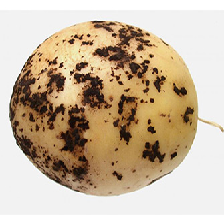


==== Pink Rot ====
Shape of x (Pink Rot): (51, 224, 224, 3)
Shape of y (Pink Rot): (51,)
latest index :  483


array([[[ 8,  8,  8],
        [ 6,  6,  6],
        [14, 14, 14],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[66, 66, 66],
        [65, 65, 65],
        [66, 66, 66],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [65, 65, 65]]], dtype=uint8)
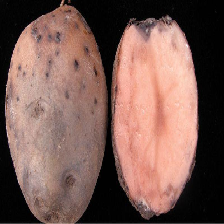


==== Common Scab ====
Shape of x (Common Scab): (60, 224, 224, 3)
Shape of y (Common Scab): (60,)
latest index :  543


array([[[15, 14, 10],
        [16, 15, 11],
        [17, 16, 12],
        ...,
        [15, 14, 10],
        [15, 14, 10],
        [15, 14, 10]],

       [[16, 15, 11],
        [16, 15, 11],
        [16, 15, 11],
        ...,
        [15, 14, 10],
        [15, 14, 10],
        [14, 13,  9]],

       [[17, 16, 12],
        [16, 15, 11],
        [15, 14, 10],
        ...,
        [15, 14, 10],
        [15, 14, 10],
        [16, 15, 11]],

       ...,

       [[20, 16, 13],
        [18, 14, 11],
        [16, 12,  9],
        ...,
        [15, 14, 10],
        [15, 14, 10],
        [15, 14, 10]],

       [[18, 14, 11],
        [18, 14, 11],
        [18, 14, 11],
        ...,
        [13, 12,  8],
        [17, 16, 12],
        [19, 18, 14]],

       [[18, 14, 11],
        [17, 13, 10],
        [19, 15, 12],
        ...,
        [14, 13,  9],
        [14, 13,  9],
        [15, 14, 10]]], dtype=uint8)
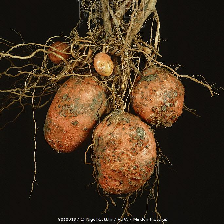


==== Dry Rot ====
Shape of x (Dry Rot): (51, 224, 224, 3)
Shape of y (Dry Rot): (51,)
latest index :  594


array([[[234, 236, 235],
        [234, 236, 235],
        [234, 236, 235],
        ...,
        [242, 244, 243],
        [242, 244, 243],
        [242, 244, 243]],

       [[234, 236, 235],
        [234, 236, 235],
        [234, 236, 235],
        ...,
        [242, 244, 243],
        [242, 244, 243],
        [242, 244, 243]],

       [[234, 236, 235],
        [234, 236, 235],
        [234, 236, 235],
        ...,
        [242, 244, 243],
        [242, 244, 243],
        [242, 244, 243]],

       ...,

       [[228, 230, 229],
        [228, 230, 229],
        [228, 230, 229],
        ...,
        [240, 242, 241],
        [240, 242, 241],
        [240, 242, 241]],

       [[228, 230, 229],
        [228, 230, 229],
        [228, 230, 229],
        ...,
        [240, 242, 241],
        [240, 242, 241],
        [240, 242, 241]],

       [[228, 230, 229],
        [228, 230, 229],
        [228, 230, 229],
        ...,
        [240, 242, 241],
        [240, 242, 241],
        [240, 242, 241]]], dtype=uint8)
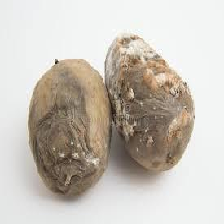

In [16]:
# ==========================================================================================

folder_path = '/content/drive/My Drive/Final_Potato/test_data/'
x, y, z = process_dataset_nosplit(folder_path, 'Healthy')
x_combined, y_combined, z_combined = x, y, z
print('latest index : ', len(x_combined) - 1)
display(x[0])

check_ind = [len(x_combined) - 1]
check_class = ['Healthy']
for i in list(class_mapping.keys())[1:]:
    x, y, z = process_dataset_nosplit(folder_path, i)
    x_combined = np.concatenate((x_combined, x), axis=0)
    y_combined = np.concatenate((y_combined, y), axis=0)
    z_combined = np.concatenate((z_combined, z), axis=0)
    print('latest index : ', len(x_combined) - 1)
    display(x[0])
    print()
    check_ind.append(len(x_combined) - 1)
    check_class.append(i)

x_test, y_test = x_combined, y_combined


## Label and Unlabel

In [17]:
# import numpy as np
# import os
# import tensorflow as tf
# from sklearn.utils import shuffle

# allowed_extensions = (".JPG", ".jpg", ".jpeg", ".JPEG", ".PNG", ".png")
# class_mapping = {'Healthy': 0, 'Blackleg': 1, 'Black Scurf': 2, 'Pink Rot': 3, 'Common Scab': 4, 'Dry Rot': 5}

# def process_dataset_with_split(folder_path, class_name, num_labeled=20):
#     print(f'Processing class: {class_name}')
#     x_labeled, y_labeled, z_labeled = [], [], []
#     x_unlabeled, y_unlabeled, z_unlabeled = [], [], []

#     # Collect files and shuffle
#     file_paths = [os.path.join(folder_path, class_name, filename) for filename in os.listdir(os.path.join(folder_path, class_name))
#                   if filename.endswith(allowed_extensions)]
#     file_paths = shuffle(file_paths, random_state=42)  # Use random_state for consistency

#     # Split data
#     labeled_files = file_paths[:num_labeled]
#     unlabeled_files = file_paths[num_labeled:]

#     # Load images and assign to labeled or unlabeled
#     for file_path in labeled_files:
#         img = tf.keras.preprocessing.image.load_img(file_path, target_size=(224, 224))
#         img_array = tf.keras.preprocessing.image.img_to_array(img).astype(np.uint8)
#         x_labeled.append(img_array)
#         y_labeled.append(class_mapping[class_name])

#     for file_path in unlabeled_files:
#         img = tf.keras.preprocessing.image.load_img(file_path, target_size=(224, 224))
#         img_array = tf.keras.preprocessing.image.img_to_array(img).astype(np.uint8)
#         x_unlabeled.append(img_array)
#         y_unlabeled.append(class_mapping[class_name])

#     return (np.array(x_labeled), np.array(y_labeled)), (np.array(x_unlabeled), np.array(y_unlabeled))

# # Example usage for loading and splitting data
# folder_path = '/content/drive/My Drive/Final_Potato/train_data/archive/'
# x_labeled, y_labeled, x_unlabeled, y_unlabeled = [], [], [], []

# for class_name in class_mapping.keys():
#     if class_name == 'Healthy':
#         num_labeled = 90
#     else:
#         num_labeled = 20
#     (x_l, y_l), (x_u, y_u) = process_dataset_with_split(folder_path, class_name,  num_labeled)
#     plt.figure(figsize = (2,2))
#     plt.imshow(x_l[0])
#     plt.show()
#     print('#Label :', y_l.shape)
#     print('#Un Label :', y_u.shape)
#     print('====================================================')

#     x_labeled.append(x_l)
#     y_labeled.append(y_l)
#     x_unlabeled.append(x_u)
#     y_unlabeled.append(y_u)

# # Concatenate arrays from all classes
# x_labeled = np.concatenate(x_labeled, axis=0)
# y_labeled = np.concatenate(y_labeled, axis=0)
# x_unlabeled = np.concatenate(x_unlabeled, axis=0)
# y_unlabeled = np.concatenate(y_unlabeled, axis=0)

# print('Labeled data shape:', x_labeled.shape, y_labeled.shape)
# print('Unlabeled data shape:', x_unlabeled.shape, y_unlabeled.shape)


# Cosine Sim


## VGG16 Origin

In [19]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.layers import GlobalMaxPooling2D
# from tensorflow.keras.models import Model
# from tensorflow.keras.applications.vgg16 import preprocess_input
# from sklearn.metrics.pairwise import cosine_similarity
# import matplotlib.pyplot as plt

# # Define class mapping
# class_mapping = {'Healthy': 0, 'Blackleg': 1, 'Black Scurf': 2, 'Pink Rot': 3, 'Common Scab': 4, 'Dry Rot': 5}
# reverse_class_mapping = {v: k for k, v in class_mapping.items()}

# # Preprocess images
# def preprocess_images(images):
#     return preprocess_input(images)

# # Build the VGG16 model with global max pooling
# def build_feature_extractor():
#     base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#     # Freeze all layers except the last three
#     for layer in base_model.layers[:-3]:
#         layer.trainable = False

#     # Add Global Max Pooling layer
#     x = base_model.output
#     x = GlobalMaxPooling2D()(x)
#     model = Model(inputs=base_model.input, outputs=x)

#     return model

# # Extract features from images
# def extract_features(images, model):
#     return model.predict(images)

# # Calculate similarity
# def calculate_similarity(features):
#     return cosine_similarity(features)

# # Find most similar images
# def find_most_similar_images(similarities, top_n=5):
#     most_similar_indices = np.argsort(-similarities, axis=1)[:, 1:top_n+1]  # Exclude self-similarity
#     return most_similar_indices

# # Predict class based on similarity
# def predict_class(similarities, class_labels):
#     predicted_classes = []
#     for i in range(similarities.shape[0]):
#         top_indices = np.argsort(-similarities[i])[:1]  # Get the index of the most similar image
#         predicted_classes.append(class_labels[top_indices[0]])
#     return predicted_classes

# # Display similar images with similarity scores
# def display_similar_images(images, indices, predicted_classes, similarities, num_images=5):
#     for i in range(len(images)):
#         plt.figure(figsize=(15, 3))
#         plt.subplot(1, num_images + 1, 1)
#         plt.imshow(images[i])  # Display image directly
#         plt.title(f'Query: {reverse_class_mapping[y_labeled[i]]}')
#         plt.axis('off')

#         for j in range(num_images):
#             plt.subplot(1, num_images + 1, j + 2)
#             plt.imshow(images[indices[i][j]])  # Display similar images
#             plt.title(f'Rank {j+1}\n{reverse_class_mapping[predicted_classes[i]]}\nScore: {similarities[i][indices[i][j]]:.2f}')
#             plt.axis('off')

#         plt.show()



# # ============================================================
# # Ensure x_labeled is resized to (224, 224, 3)
# x_train_resized = np.array([tf.image.resize(img, (224, 224)).numpy() for img in x_train])

# # Preprocess images
# images = preprocess_images(x_train_resized)

# # Build and compile feature extractor model
# feature_extractor = build_feature_extractor()

# # Extract features
# features = extract_features(images, feature_extractor)

# # Calculate similarities
# similarities = calculate_similarity(features)

# # Find the most similar images
# most_similar_indices = find_most_similar_images(similarities, top_n=5)

# # Predict class for each image based on most similar images
# predicted_classes = predict_class(similarities, y_train)

# # Convert images for display
# images_for_display = [tf.keras.preprocessing.image.array_to_img(img) for img in x_train_resized]

# # Display results
# display_similar_images(images_for_display, most_similar_indices, predicted_classes, similarities, num_images=5)

## VGG16 V2

In [44]:
np_random_seed = 1
tf_random_seed = 1
np.random.seed(np_random_seed)
tf.random.set_seed(tf_random_seed)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 723ms/step - accuracy: 0.3804 - loss: 9.9836 - val_accuracy: 0.4876 - val_loss: 1.4863
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 557ms/step - accuracy: 0.5242 - loss: 1.3562 - val_accuracy: 0.5207 - val_loss: 1.2898
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 555ms/step - accuracy: 0.6118 - loss: 1.1393 - val_accuracy: 0.6033 - val_loss: 1.1114
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 533ms/step - accuracy: 0.6783 - loss: 0.9152 - val_accuracy: 0.6281 - val_loss: 0.9495
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 525ms/step - accuracy: 0.7285 - loss: 0.7067 - val_accuracy: 0.6612 - val_loss: 0.7899
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 509ms/step - accuracy: 0.8116 - loss: 0.5381 - val_accuracy: 0.6281 - val_loss: 1.1643
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 519ms/step - accuracy: 0.7965 - loss: 0.5641 - val_accuracy: 0.5372 - val_loss: 1.1946
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 514ms/step - accuracy: 0.8480 - loss: 0.4003 - val_accur

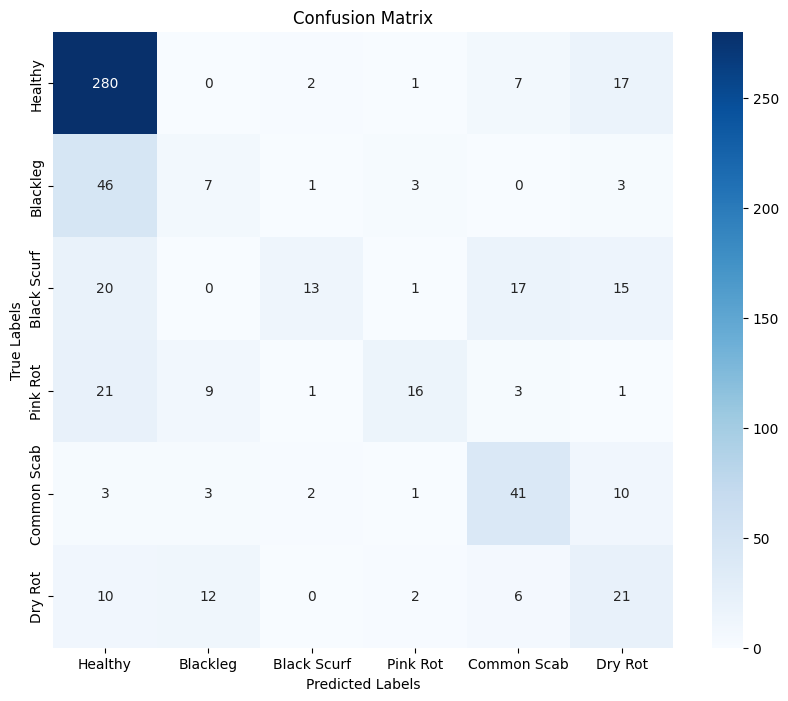

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Define class mapping
class_mapping = {'Healthy': 0, 'Blackleg': 1, 'Black Scurf': 2, 'Pink Rot': 3, 'Common Scab': 4, 'Dry Rot': 5}
reverse_class_mapping = {v: k for k, v in class_mapping.items()}

# Preprocess images
def preprocess_images(images):
    return preprocess_input(images)


# Build the VGG16 model with global max pooling
def build_feature_extractor(fine_tune=False):
    global model
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    if fine_tune:
        # Unfreeze the top layers of the model
        for layer in base_model.layers:
            layer.trainable = True

        # # Access specific layers by their names and make them trainable
        # for layer_name in ['block5_conv1', 'block5_conv2', 'block5_conv3']:
        #     layer = base_model.get_layer(layer_name)
        #     layer.trainable = True
        #     print(f"Layer {layer.name}: trainable = {layer.trainable}")


    # Add Global Max Pooling layer
    x = base_model.output
    x = GlobalMaxPooling2D()(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(len(class_mapping), activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Extract features from images
def extract_features(images, model):
    feature_extractor = Model(inputs=model.input, outputs=model.layers[-3].output)
    return feature_extractor.predict(images)

# Calculate similarity
def calculate_similarity(features):
    return cosine_similarity(features)

# Find most similar images
def find_most_similar_images(similarities, top_n=5):
    most_similar_indices = np.argsort(-similarities, axis=1)[:, 1:top_n+1]  # Exclude self-similarity
    return most_similar_indices

# Predict class based on similarity
def predict_class(similarities, class_labels, top_n=20):
    predicted_classes = []
    for i in range(similarities.shape[0]):
        top_indices = np.argsort(-similarities[i])[:top_n]
        top_classes = [class_labels[idx] for idx in top_indices]
        most_common_class = Counter(top_classes).most_common(1)[0][0]
        predicted_classes.append(most_common_class)
    return predicted_classes

# Plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


# ============================================================
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=42)

# Resize and preprocess images
x_train_resized = np.array([tf.image.resize(img, (224, 224)).numpy() for img in x_train])
x_test_resized = np.array([tf.image.resize(img, (224, 224)).numpy() for img in x_test])
x_train_preprocessed = preprocess_images(x_train_resized)
x_test_preprocessed = preprocess_images(x_test_resized)

# Build and compile feature extractor model
feature_extractor = build_feature_extractor(fine_tune=True)

# Fine-tune the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = feature_extractor.fit(
    x_train_preprocessed, y_train,
    epochs=30,
    validation_split=0.2,
    callbacks=[early_stopping],
    batch_size=32
)

# Extract features
train_features = extract_features(x_train_preprocessed, feature_extractor)
test_features = extract_features(x_test_preprocessed, feature_extractor)

# Calculate similarities between train and test features
similarities = cosine_similarity(test_features, train_features)

# Predict classes for test images
predicted_classes = predict_class(similarities, y_train, top_n=100)

# Calculate accuracy, recall, precision, and confusion matrix
accuracy = accuracy_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes, average='macro')
precision = precision_score(y_test, predicted_classes, average='macro')
conf_matrix = confusion_matrix(y_test, predicted_classes)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print('Confusion Matrix:')


# Define class names based on the class mapping
class_names = [reverse_class_mapping[i] for i in range(len(reverse_class_mapping))]

plot_confusion_matrix(conf_matrix, class_names)


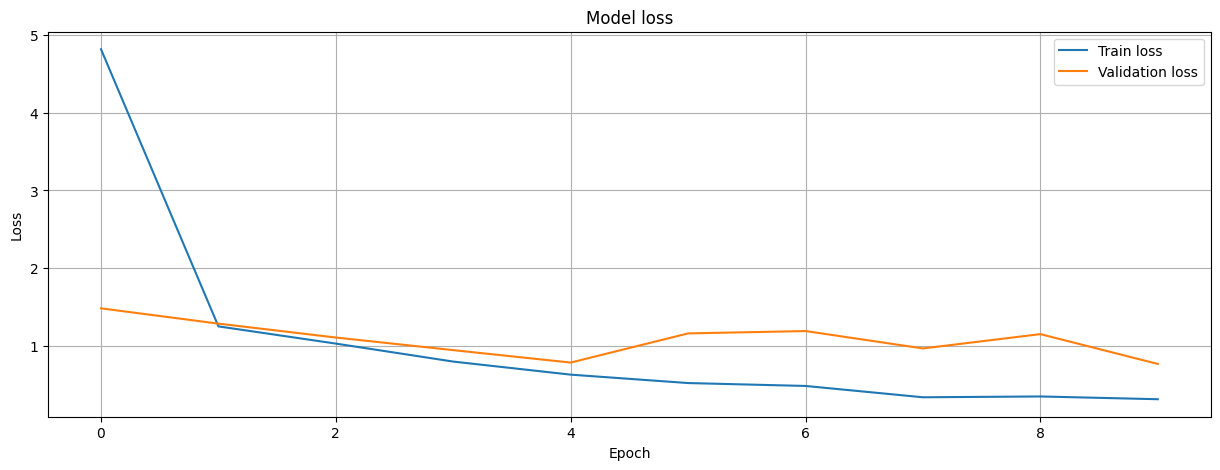

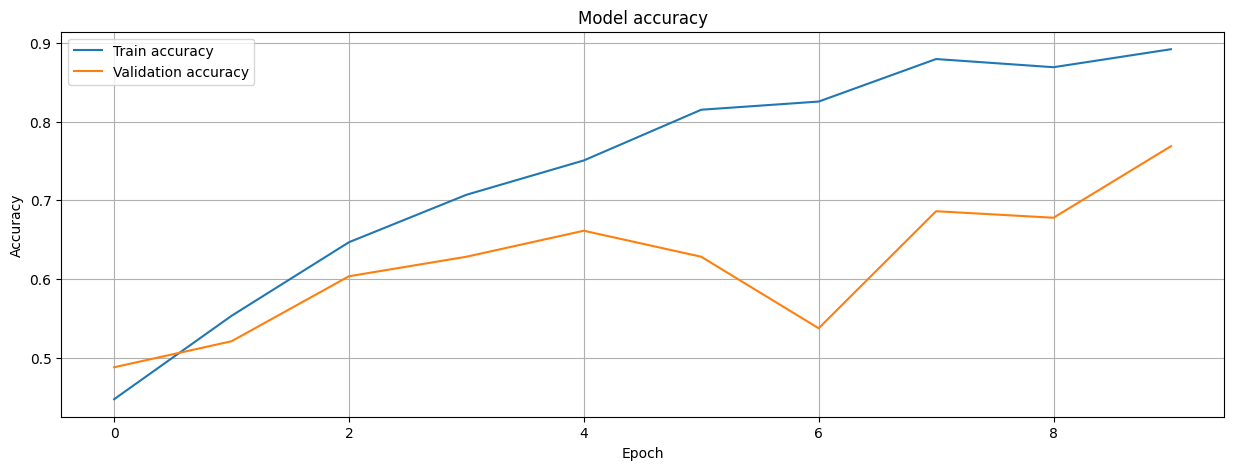

In [46]:
# Summarize history for loss
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Summarize history for accuracy
plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()
